Вариант №1

1. Опишите теоретическую модель линейной и логистической регрессии.
2. Напишите следующий год: сгенерируйте данные в виде набора точек по нескольким кластерам; выполните кластеризацию; визуализируйте результат.
3. Опишите метрику для проверки качества алгоритмов классификации.

## Задание 1
#### 1. Линейная регрессия

Это метод для моделирования непрерывной целевой переменной y на основе одного или нескольких признаков X.

Модель:

$ a(x) = β_0+β_1 x_1 + β_2 x_2 + ⋯ + β_ p x_p $

где:

y — целевая переменная,

β0 — свободный член,

β1,…,βp — коэффициенты при признаках,

x1,…,xp​ — признаки,

Функционал ошибки

$ Q(a, x) = MAE = \frac{1}{l} \sum_{i=1}^{l} |a(x_i) - y_i| \rarr min_w$

$ Q(a, x) = MSE = \frac{1}{l} \sum_{i=1}^{l} (a(x_i) - y_i)^2  \rarr min_w$

Оценка параметров выполняется методом наименьших квадратов (минимизация суммы квадратов ошибок - MSE).

Предположения: линейность связи, независимость ошибок, нормальность ошибок.

#### 2. Логистическая регрессия

Используется для бинарной классификации (вероятность принадлежности к классу 0 или 1).

Модель (логит-преобразование):

$ P(y = 1 | X) = \frac{1}{1 + exp(-z)}, \\
z = \beta_0 +  \beta_1 x_1 + ... + \beta_p x_p  ( = <w, x>)$

Функция потерь — Логистическая (Binary Cross-Entropy):

$ LogLoss = - \frac{1}{n} \sum_{i=1}^n [y_i log(\sigma) + (1 - y_i) log(1 - \sigma)] $

$p_i$ = вероятность, предсказанная моделью для истинного класса $y_i$

Принятие решения: Для получения итогового бинарного предсказания (0 или 1) вероятность сравнивается с порогом (обычно 0.5):

$y_{class} = 
\begin{cases}
    1, если \quad P(y = 1 | x) >= 0.5, \\
    0, если \quad P(y = 1 | x) < 0.5, \\
\end{cases}
$


## Задание 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


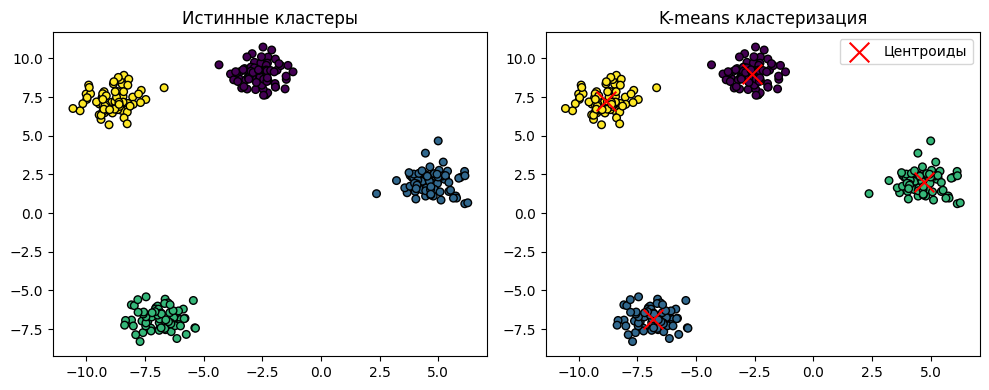

In [4]:

# Генерация данных: 4 кластера
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.7, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=30, edgecolor='k')
plt.title("Истинные кластеры")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=30, edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Центроиды')
plt.title("K-means кластеризация")
plt.legend()

plt.tight_layout()
plt.show()

## Задание 3

Матрица ошибок - классический способ представления результатов работы классификатора, особенно, бинарного классификатора.

По горизонтали откладывается истинное значение класса объекта. По вертикали результат работы модели. На пересечении получается набор вариантов срабатывания, которые сейчас обозначены классическими для компьютерных наук терминами:

    TN | FP
    FN | TP 


- TP - истинно-положительное или истинно-верное срабатывание. "Положительный" объект был отнесён к "положительному" классу. 
- FP - ложно-положительное срабатывание. "Отрицательный" объект был отнесён к "положительному" классу. 
- FN - ложно-отрицательное срабатывание. "Положительный" объект был отнесён к "отрицательному" классу. 
- TN - истинно-отрицательное срабатывание. "Отрицательный" объект был отнесён к "отрицательному" классу. 
 

Исходя из этой матрицы можно выделить два разных типа ошибок.

#### 1. Accuracy:
Общая доля верных предсказаний.

$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} $

#### 2. Precision:
Доля верно предсказанных положительных классов среди всех предсказанных положительных.

$ Precision = \frac{TP}{TP + FP} $

#### 3. Recall:
Доля верно предсказанных положительных классов среди всех истинных положительных.

$ Recall = \frac{TP}{TP + FN} $

#### 4. F-мера:
Гармоническое среднее между точностью и полнотой.

$ F = 2 \cdot \frac{Presicion \cdot Recall}{Presicion + Recall} $
